In [1]:
import pandas as pd

# Load the dataset
file_path = 'Initial_Accuracy.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


    Crop        Date  Real-Time         NN           ML
0    NaN         NaN        NaN        NaN          NaN
1  Onion  04/03/2024     1200.0  1467.0795  1629.453092
2  Onion  05/03/2024     1200.0  1472.8328  1632.545937
3  Onion  05/03/2024     1400.0  1472.8328  1632.545937
4  Onion  06/03/2024     1400.0  1468.8884  1632.545937


In [2]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Fill non-finite values with a default value (e.g., 0)
data['Real-Time'] = pd.to_numeric(data['Real-Time'], errors='coerce').fillna(0).astype(int)
data['NN'] = pd.to_numeric(data['NN'], errors='coerce').fillna(0).astype(int)
data['ML'] = pd.to_numeric(data['ML'], errors='coerce').fillna(0).astype(int)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Crop       36 non-null     object        
 1   Date       36 non-null     datetime64[ns]
 2   Real-Time  39 non-null     int32         
 3   NN         39 non-null     int32         
 4   ML         39 non-null     int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 1.2+ KB


In [3]:
data.head()

,Crop,Date,Real-Time,NN,ML
0,NaN,NaT,0,0,0
1,Onion,2024-03-04,1200,1467,1629
2,Onion,2024-03-05,1200,1472,1632
3,Onion,2024-03-05,1400,1472,1632
4,Onion,2024-03-06,1400,1468,1632


In [4]:
Onion_data = data[data['Crop'] == 'Onion']
Corn_data = data[data['Crop'] == 'Corn']
Potato_data = data[data['Crop'] == 'Potato']

In [5]:
Onion_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Crop       15 non-null     object        
 1   Date       15 non-null     datetime64[ns]
 2   Real-Time  15 non-null     int32         
 3   NN         15 non-null     int32         
 4   ML         15 non-null     int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 540.0+ bytes


In [6]:
Corn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 17 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Crop       12 non-null     object        
 1   Date       12 non-null     datetime64[ns]
 2   Real-Time  12 non-null     int32         
 3   NN         12 non-null     int32         
 4   ML         12 non-null     int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 432.0+ bytes


In [7]:
Potato_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 30 to 38
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Crop       9 non-null      object        
 1   Date       9 non-null      datetime64[ns]
 2   Real-Time  9 non-null      int32         
 3   NN         9 non-null      int32         
 4   ML         9 non-null      int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 324.0+ bytes


In [8]:
import matplotlib.pyplot as plt

def plot_data(crop_data, crop_name):
    plt.figure(figsize=(12, 6))
    
    plt.plot(crop_data['Date'], crop_data['Real-Time'], label='Real-Time',linestyle='--', color='blue')
    plt.plot(crop_data['Date'], crop_data['NN'], label='NN', linestyle='--', color='green')
    plt.plot(crop_data['Date'], crop_data['ML'], label='ML', linestyle='--', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'{crop_name} - Real-Time vs NN vs ML')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Annotate each point with its value
    for i in range(len(crop_data)):
        plt.text(crop_data['Date'].iloc[i], crop_data['Real-Time'].iloc[i], crop_data['Real-Time'].iloc[i], fontsize=8)
        plt.text(crop_data['Date'].iloc[i], crop_data['NN'].iloc[i], crop_data['NN'].iloc[i], fontsize=8)
        plt.text(crop_data['Date'].iloc[i], crop_data['ML'].iloc[i], crop_data['ML'].iloc[i], fontsize=8)
    
    plt.show()

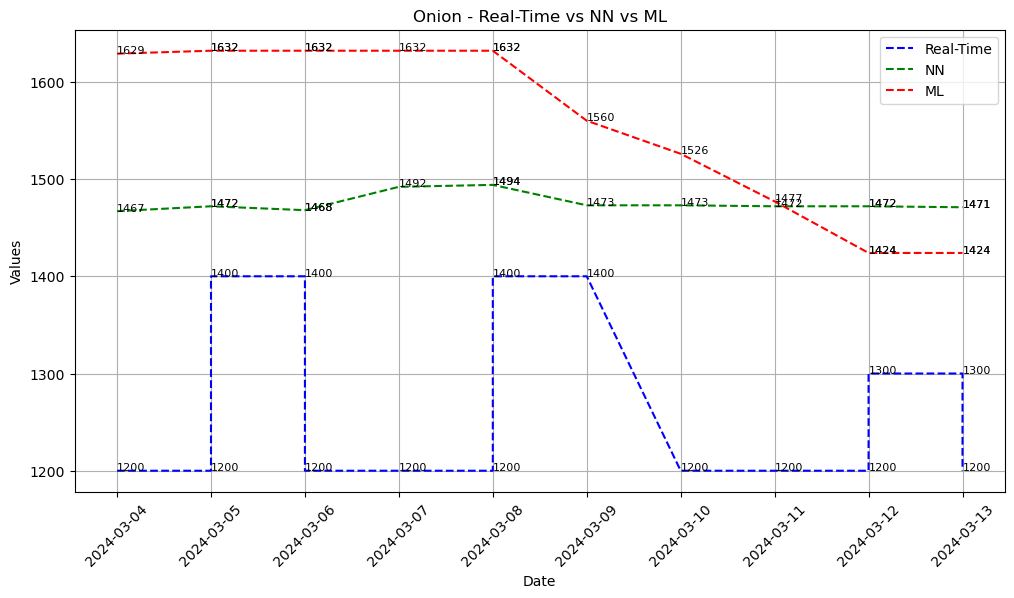

In [9]:
plot_data(Onion_data, 'Onion')

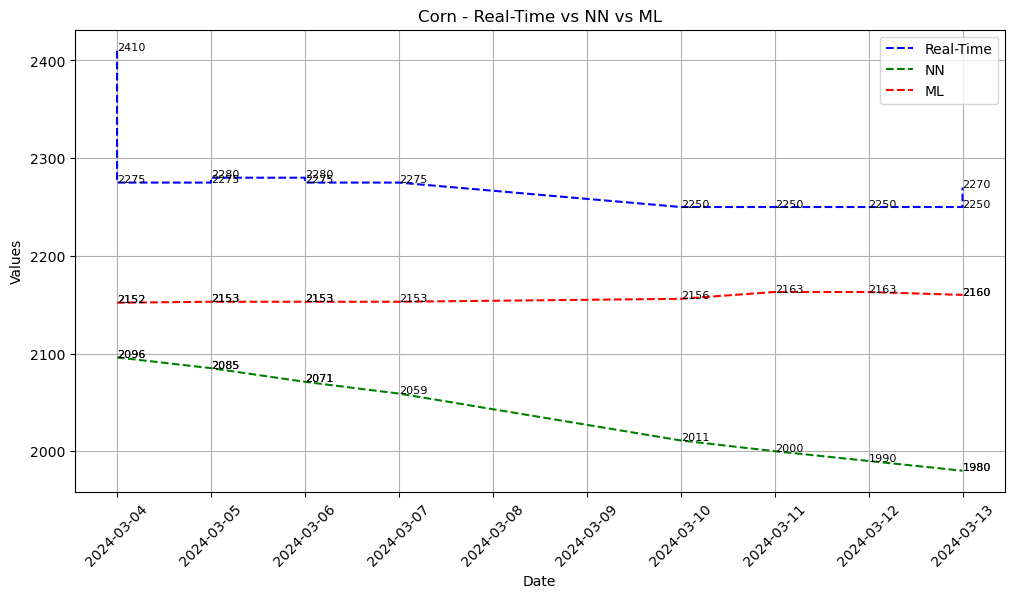

In [10]:
plot_data(Corn_data, 'Corn')

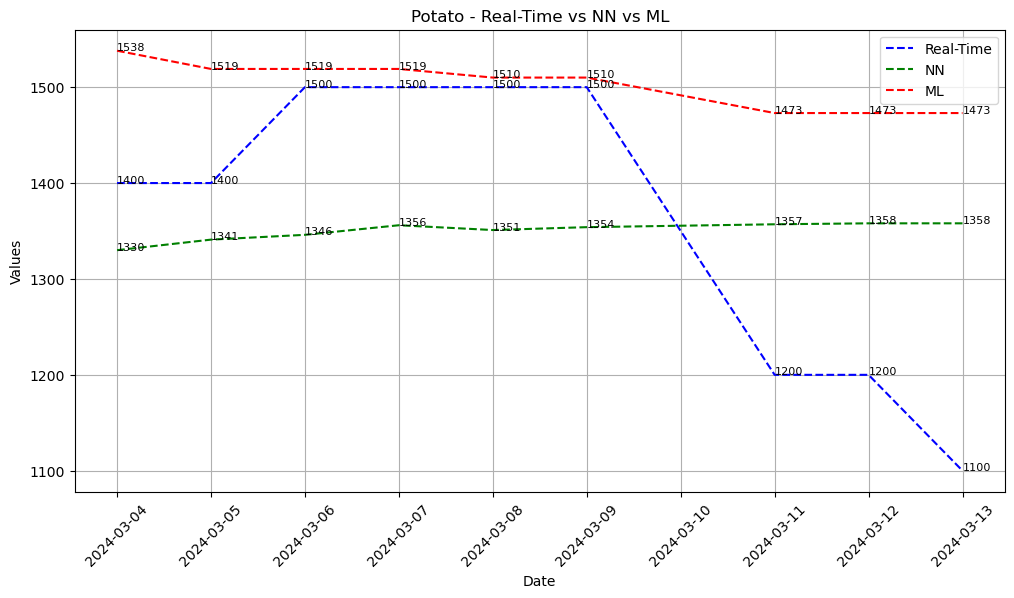

In [11]:
plot_data(Potato_data, 'Potato')